In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')

In [3]:
df = pd.concat([train_df, test_df], axis=0, sort=False)

In [4]:
df.shape

(58159, 112)

In [5]:
df.sample(5)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
12365,-0.198882,1.148100,-0.214474,1.496030,-0.101569,-0.269325,-0.097828,-0.189111,-0.041631,-0.017253,...,-0.115137,-0.601408,-0.365471,1.307117,1.001600,-0.368740,-0.034156,-0.046618,0.0,1
8388,-0.198882,-0.342454,-0.214474,-0.951056,-0.101569,-0.269325,-0.097828,-0.189111,-0.041631,-0.017253,...,-0.115137,0.134244,0.217812,-0.295199,1.001600,-0.368740,-0.034156,-0.046618,0.0,0
4380,-0.198882,-0.342454,-0.214474,-0.951056,-0.101569,-0.269325,-0.097828,-0.189111,-0.041631,-0.017253,...,-0.115137,-0.601408,-0.948753,-0.673050,-0.998402,-0.368740,-0.034156,-0.046618,0.0,0
12985,0.479084,-0.342454,-0.214474,0.027778,-0.101569,-0.269325,-0.097828,-0.189111,-0.041631,-0.017253,...,-0.115137,0.134244,-0.365471,-0.273419,1.001600,0.865678,-0.034156,-0.046618,0.0,1
20798,3.868915,1.148100,-0.214474,1.006612,-0.101569,-0.269325,-0.097828,-0.189111,9.234997,-0.017253,...,-0.115137,-0.601408,-0.365471,0.394318,-0.998402,0.865678,-0.034156,-0.046618,0.0,1


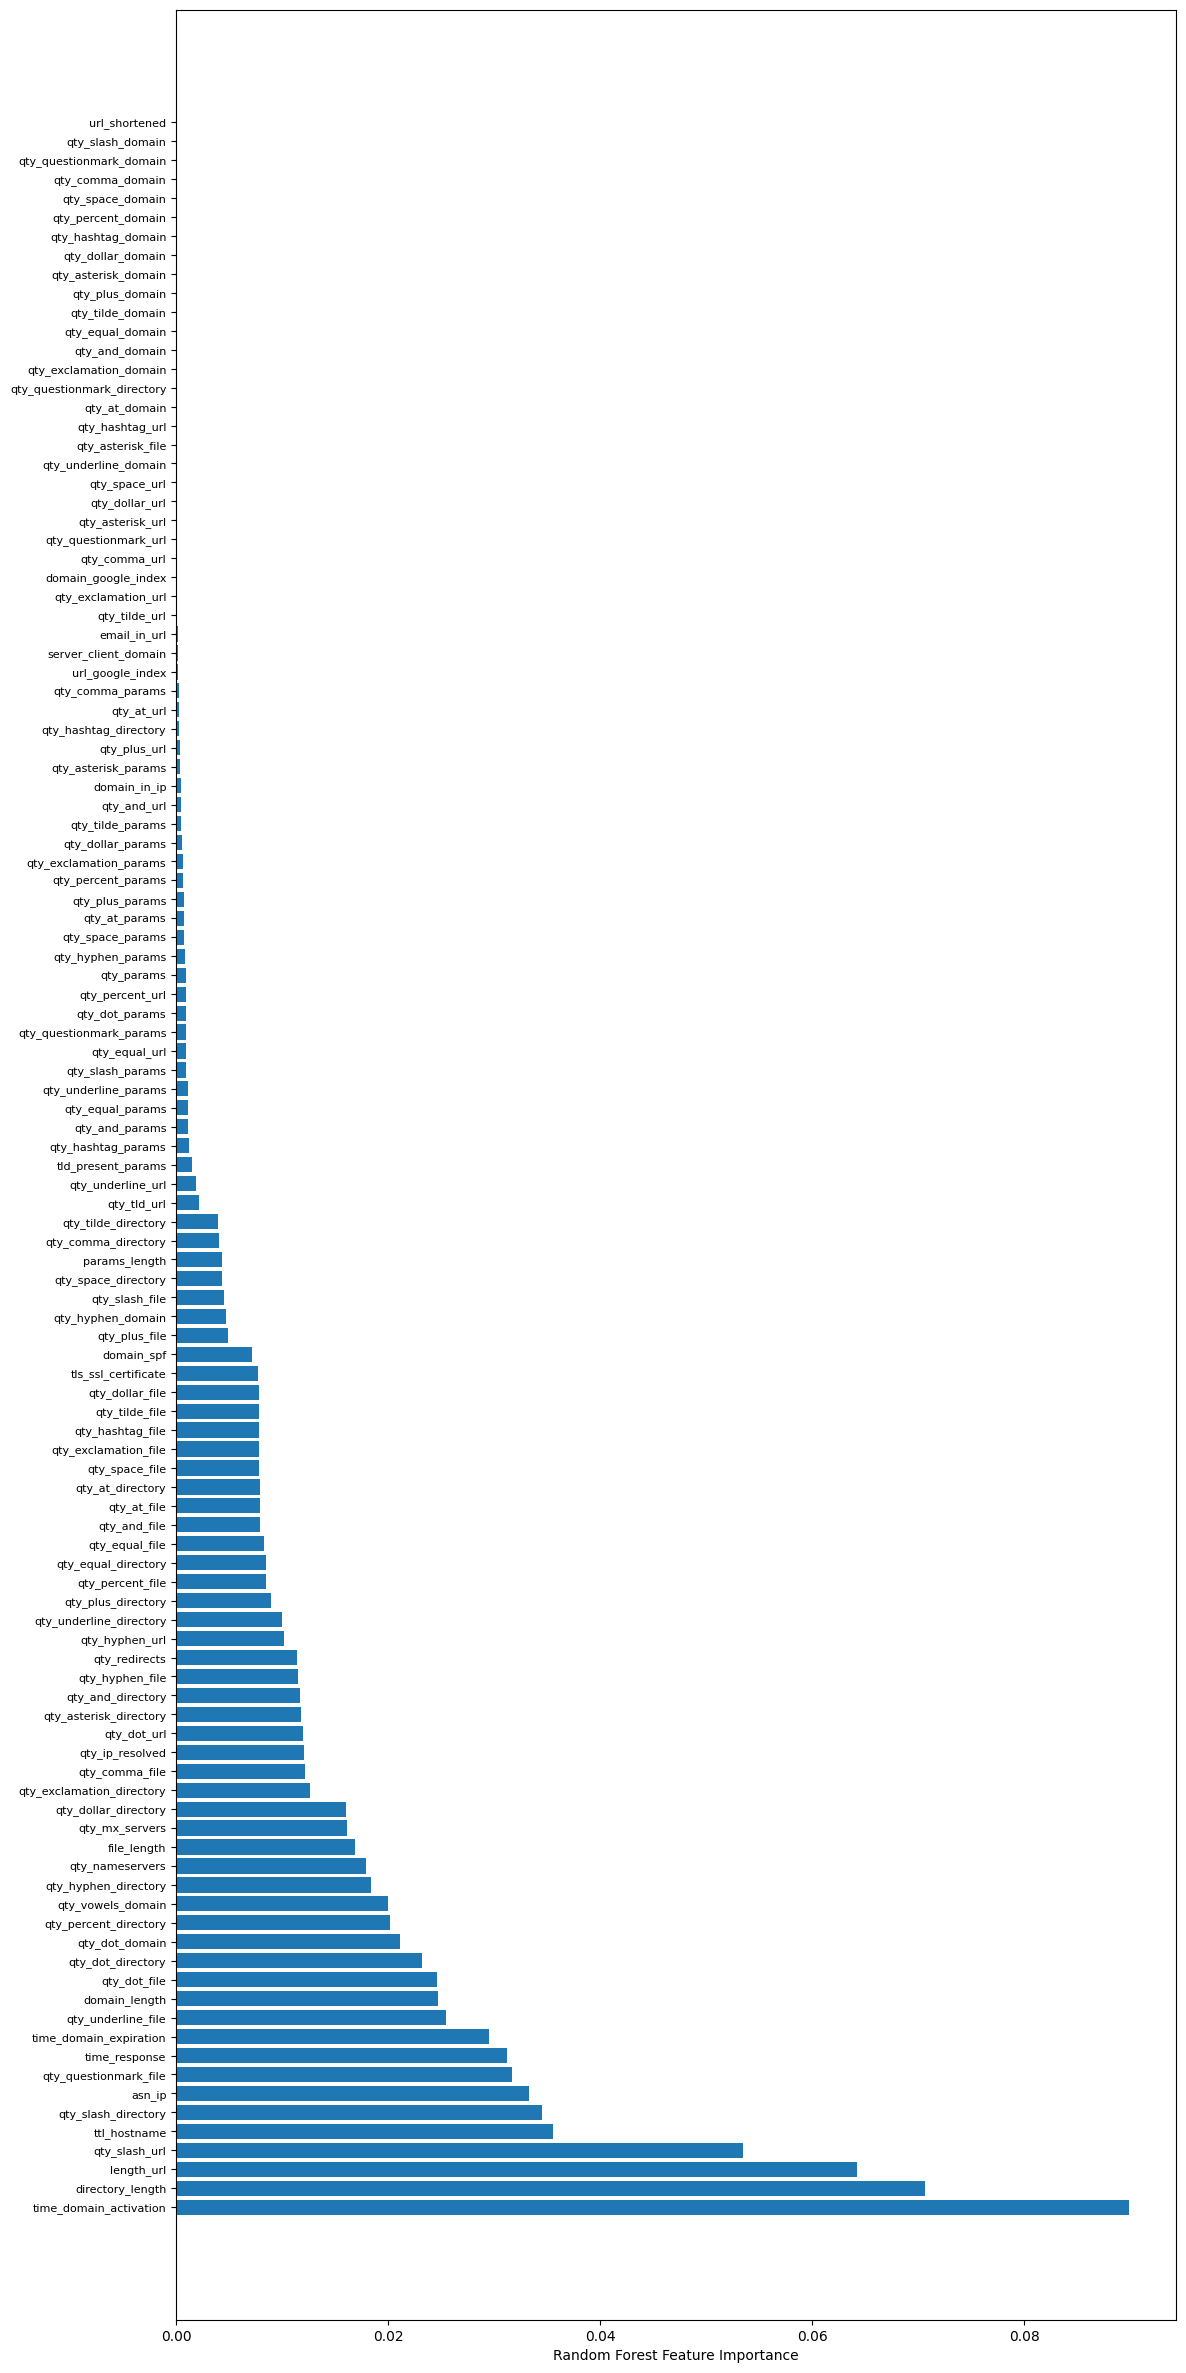

In [6]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier

X = df.drop('phishing', axis=1)
y = df['phishing']

# Get the feature names
col_names = X.columns.tolist()

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
idxs = np.argsort(importances)[::-1]

# Create a horizontal bar plot
plt.figure(figsize=(20, 30))  # Increase the figure size for better visibility
plt.barh(range(len(idxs)), importances[idxs], align='center')

# Set x-tick labels and x-axis label
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs], fontsize=8)  # Decrease the font size for better visibility
plt.xlabel('Random Forest Feature Importance')

# Rotate feature names for better visibility
plt.subplots_adjust(left=0.4)  # Adjust the left margin to make room for feature names

# Show the plot
plt.show()

Feature: time_domain_activation, Importance: 0.0899
Feature: directory_length, Importance: 0.0706
Feature: length_url, Importance: 0.0642
Feature: qty_slash_url, Importance: 0.0535
Feature: ttl_hostname, Importance: 0.0355
Feature: qty_slash_directory, Importance: 0.0345
Feature: asn_ip, Importance: 0.0333
Feature: qty_questionmark_file, Importance: 0.0317
Feature: time_response, Importance: 0.0312
Feature: time_domain_expiration, Importance: 0.0295
Feature: qty_underline_file, Importance: 0.0254
Feature: domain_length, Importance: 0.0247
Feature: qty_dot_file, Importance: 0.0246
Feature: qty_dot_directory, Importance: 0.0231
Feature: qty_dot_domain, Importance: 0.0211
Feature: qty_percent_directory, Importance: 0.0202
Feature: qty_vowels_domain, Importance: 0.0200
Feature: qty_hyphen_directory, Importance: 0.0184
Feature: qty_nameservers, Importance: 0.0179
Feature: file_length, Importance: 0.0169
Feature: qty_mx_servers, Importance: 0.0162
Feature: qty_dollar_directory, Importance: 0

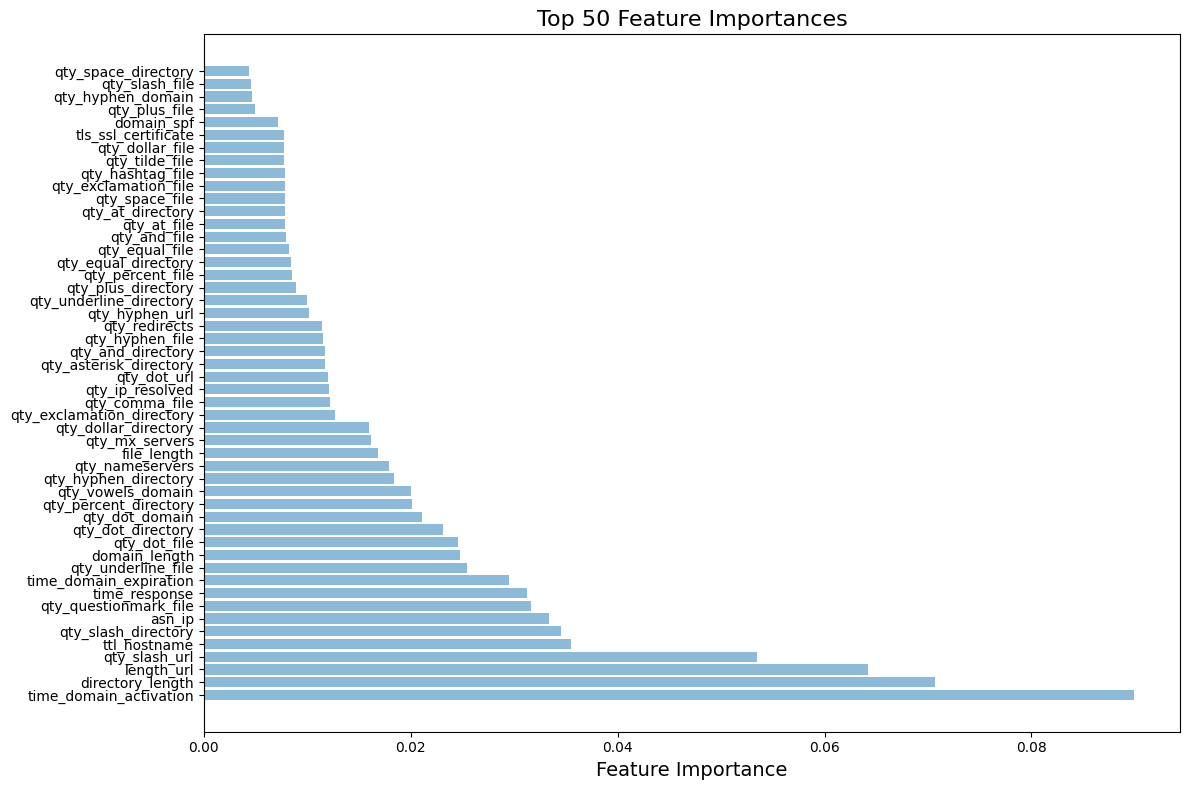

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming col_names, importances, and idxs are defined
# col_names, importances, idxs = ...

num_features = min(50, len(idxs))
top_50_features = [(col_names[i], importances[i]) for i in idxs[:num_features]]

# Print the top 50 features and their importances
for feature, importance in top_50_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")

# Create a figure with a larger size
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figsize as needed

# Create a list of feature names and importances
feature_names = [name for name, _ in top_50_features]
importances = [importance for _, importance in top_50_features]

# Create a horizontal bar plot
y_pos = np.arange(len(feature_names))
ax.barh(y_pos, importances, align='center', alpha=0.5)

# Set the x-axis label
ax.set_xlabel('Feature Importance', fontsize=14)  # Increase font size for labels

# Set the y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names, fontsize=10)  # Increase font size for feature names

# Set the title
ax.set_title('Top 50 Feature Importances', fontsize=16)  # Increase font size for title

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
len(top_50_features)

50

In [9]:
# Get the feature names from top_50_features
top_50_feature_names = [name for name, _ in top_50_features]

# Create a new DataFrame with only the top 50 features
# Create a new DataFrame with the top 50 features and the target variable
new_df = df[top_50_feature_names + ['phishing']]

In [10]:
new_df.shape

(58159, 51)

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58159 entries, 0 to 17447
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time_domain_activation     58159 non-null  float64
 1   directory_length           58159 non-null  float64
 2   length_url                 58159 non-null  float64
 3   qty_slash_url              58159 non-null  float64
 4   ttl_hostname               58159 non-null  float64
 5   qty_slash_directory        58159 non-null  float64
 6   asn_ip                     58159 non-null  float64
 7   qty_questionmark_file      58159 non-null  float64
 8   time_response              58159 non-null  float64
 9   time_domain_expiration     58159 non-null  float64
 10  qty_underline_file         58159 non-null  float64
 11  domain_length              58159 non-null  float64
 12  qty_dot_file               58159 non-null  float64
 13  qty_dot_directory          58159 non-null  float64


In [12]:
x = new_df.drop('phishing', axis=1)
y = new_df['phishing']

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn import metrics


model = CatBoostClassifier(
        iterations=500, 
        random_seed=42,
        learning_rate=0.5,
        custom_loss=['Accuracy']
    )
clf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
# clf.fit(Xtrain, ytrain)

model.fit(
        Xtrain,
        ytrain,
        eval_set=(Xtest, ytest),
        verbose=False  # Set verbose=False to suppress progress output
    )
print('Tree count: ' + str(model.tree_count_))
preds = model.predict(Xtest)
accuracy = metrics.accuracy_score(ytest, preds)
print(f"Accuracy={accuracy}")

Tree count: 311
Accuracy=0.9566712517193948


In [15]:
# import pandas as pd
# from sklearn.feature_selection import RFE

# model = RandomForestClassifier()
# # initialize RFE
# rfe = RFE(
#  estimator=model,
#  n_features_to_select=50
# )
# # fit RFE
# rfe.fit(X, y)
# # get the transformed data with
# # selected columns
# X_transformed = rfe.transform(X)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs = -1) 
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [17]:
# Get the mask of selected features
mask = rfecv.support_

# Get the names of the selected features
selected_features = X.columns[mask]

# Create a new DataFrame with the selected features
X_selected = X[selected_features]

# Save the DataFrame to a CSV file
# X_selected.to_csv('selected_features.csv', index=False)

In [18]:
X_selected

,qty_dot_url,qty_hyphen_url,qty_slash_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_vowels_domain,domain_length,qty_dot_directory,qty_hyphen_directory,...,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects
0,-0.198882,0.402823,-0.461639,-0.531700,0.245574,1.851730,-0.916475,-0.440582,-0.024060,0.027877,...,0.050059,-0.150682,-0.417216,-0.340158,-0.115137,0.134244,-0.948753,-0.588599,-0.998402,-0.368740
1,-0.198882,1.148100,1.496030,1.199658,0.245574,1.851730,2.046887,1.366514,-0.024060,0.836508,...,0.050059,-0.503464,-0.902015,-0.523953,-0.115137,0.869895,-0.948753,-0.681621,1.001600,2.100095
2,-0.198882,-0.342454,-0.951056,-0.495250,0.245574,-0.287533,-0.546054,-0.023559,-1.092252,-0.780754,...,0.050059,-0.333024,1.433513,0.177323,-0.115137,-0.601408,-0.365471,-0.447520,-0.998402,0.865678
3,0.479084,1.148100,1.985447,0.124393,0.245574,-0.287533,-0.546054,0.115448,1.044131,1.645139,...,0.050059,-0.407493,0.296606,-0.523953,-0.115137,0.134244,-0.365471,-0.284801,-0.998402,-0.368740
4,0.479084,-0.342454,0.027778,0.069719,0.245574,-0.287533,-0.175634,0.115448,1.044131,0.027877,...,1.752620,-0.262213,-0.369057,0.070258,-0.115137,-0.601408,-0.365471,0.763597,1.001600,-0.368740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17443,-0.198882,-0.342454,0.517195,-0.240103,0.245574,-0.287533,0.935627,0.254455,-0.024060,0.027877,...,0.050059,-0.390821,-0.902015,-0.523953,-0.115137,-0.601408,-0.365471,1.307257,1.001600,-0.368740
17444,1.835017,-0.342454,-0.461639,0.452440,0.245574,-0.287533,0.935627,0.949492,1.044131,0.027877,...,0.050059,-0.503464,-0.902015,-0.523953,-0.115137,0.869895,-0.948753,-0.707055,1.001600,-0.368740
17445,-0.876848,-0.342454,1.006612,-0.185429,-1.018574,-0.287533,-0.175634,-0.301574,-0.024060,0.027877,...,1.752620,-0.262213,-0.560265,-0.275919,-0.115137,-0.601408,-0.365471,1.242057,1.001600,-0.368740
17446,-0.198882,-0.342454,-0.951056,-0.422351,0.245574,-0.287533,0.935627,0.532470,-1.092252,-0.780754,...,0.050059,-0.666669,-0.902015,-0.523953,-2.319656,0.869895,-0.948753,-0.715064,-0.998402,-1.603157


In [19]:
X_selected.to_csv('./input/selected_features.csv', index=False)

In [21]:
X_selected.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_vowels_domain',
       'domain_length', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory',
       'qty_at_directory', 'qty_comma_directory', 'qty_percent_directory',
       'directory_length', 'qty_dot_file', 'qty_hyphen_file',
       'qty_underline_file', 'qty_equal_file', 'qty_at_file',
       'qty_exclamation_file', 'qty_plus_file', 'qty_hashtag_file',
       'qty_percent_file', 'file_length', 'qty_dot_params', 'qty_equal_params',
       'params_length', 'time_response', 'domain_spf', 'asn_ip',
       'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved',
       'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects'],
      dtype='object')

In [22]:
X_selected['phishing'] = y

/tmp/ipykernel_142043/3998394697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['phishing'] = y


In [23]:
X_selected.shape

(58159, 42)

In [25]:
X_selected.isnull().sum()

qty_dot_url                0
qty_hyphen_url             0
qty_slash_url              0
length_url                 0
qty_dot_domain             0
qty_hyphen_domain          0
qty_vowels_domain          0
domain_length              0
qty_dot_directory          0
qty_hyphen_directory       0
qty_underline_directory    0
qty_slash_directory        0
qty_equal_directory        0
qty_at_directory           0
qty_comma_directory        0
qty_percent_directory      0
directory_length           0
qty_dot_file               0
qty_hyphen_file            0
qty_underline_file         0
qty_equal_file             0
qty_at_file                0
qty_exclamation_file       0
qty_plus_file              0
qty_hashtag_file           0
qty_percent_file           0
file_length                0
qty_dot_params             0
qty_equal_params           0
params_length              0
time_response              0
domain_spf                 0
asn_ip                     0
time_domain_activation     0
time_domain_ex

In [26]:
X_selected.to_csv('./input/selected_features.csv', index=False)

In [27]:
x = X_selected.drop('phishing', axis=1)
y = X_selected['phishing']

In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn import metrics


model = CatBoostClassifier(
        iterations=500, 
        random_seed=42,
        learning_rate=.5,
        custom_loss=['Accuracy']
    )
# clf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
# clf.fit(Xtrain, ytrain)

model.fit(
        Xtrain,
        ytrain,
        eval_set=(Xtest, ytest),
        verbose=False  # Set verbose=False to suppress progress output
    )
print('Tree count: ' + str(model.tree_count_))
preds = model.predict(Xtest)
accuracy = metrics.accuracy_score(ytest, preds)
print(f"Accuracy={accuracy}")

Tree count: 339
Accuracy=0.9570724438331041


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Assuming X and y are your features and target
# X, y = ...

# Split the data into training and testing set

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8994154057771664


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Assuming X and y are your features and target
# X, y = ...

# Split the data into training and testing sets

# Initialize the SVM model
model = svm.SVC(kernel='linear')  # Linear Kernel

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test are your true labels and y_pred are your predicted labels
# y_test, y_pred = ...

print(classification_report(y_test, y_pred))

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("./input/selected_features.csv")
x = df.drop('phishing', axis=1)
y = df['phishing']

In [3]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

In [4]:
train_df = pd.DataFrame(Xtrain, columns=x.columns)
train_df['phishing'] = ytrain
test_df = pd.DataFrame(Xtest, columns=x.columns)
test_df['phishing'] = ytest

In [5]:
train_df.isnull().sum()

qty_dot_url                0
qty_hyphen_url             0
qty_slash_url              0
length_url                 0
qty_dot_domain             0
qty_hyphen_domain          0
qty_vowels_domain          0
domain_length              0
qty_dot_directory          0
qty_hyphen_directory       0
qty_underline_directory    0
qty_slash_directory        0
qty_equal_directory        0
qty_at_directory           0
qty_comma_directory        0
qty_percent_directory      0
directory_length           0
qty_dot_file               0
qty_hyphen_file            0
qty_underline_file         0
qty_equal_file             0
qty_at_file                0
qty_exclamation_file       0
qty_plus_file              0
qty_hashtag_file           0
qty_percent_file           0
file_length                0
qty_dot_params             0
qty_equal_params           0
params_length              0
time_response              0
domain_spf                 0
asn_ip                     0
time_domain_activation     0
time_domain_ex

In [6]:
train_df.shape

(40711, 42)

In [7]:
test_df.shape

(17448, 42)

In [8]:
test_df.isnull().sum()

qty_dot_url                0
qty_hyphen_url             0
qty_slash_url              0
length_url                 0
qty_dot_domain             0
qty_hyphen_domain          0
qty_vowels_domain          0
domain_length              0
qty_dot_directory          0
qty_hyphen_directory       0
qty_underline_directory    0
qty_slash_directory        0
qty_equal_directory        0
qty_at_directory           0
qty_comma_directory        0
qty_percent_directory      0
directory_length           0
qty_dot_file               0
qty_hyphen_file            0
qty_underline_file         0
qty_equal_file             0
qty_at_file                0
qty_exclamation_file       0
qty_plus_file              0
qty_hashtag_file           0
qty_percent_file           0
file_length                0
qty_dot_params             0
qty_equal_params           0
params_length              0
time_response              0
domain_spf                 0
asn_ip                     0
time_domain_activation     0
time_domain_ex

In [9]:
train_df.to_csv('./input/train.csv', index=False)
test_df.to_csv('./input/test.csv', index=False)